In [1]:
#splitting data

import numpy as np

data = open("data.txt", "r");
x = []
y = []
i = 0

for line in data:
    line = line.replace("\n", "")
    line = line.replace(",", ".")
    if (i % 2) == 0:
        
        x.append(float(line))
    else:
        y.append(float(line))
    i = i+1
xnp = np.array(x)
ynp = np.array(y)

In [2]:
#gauss method form square matrix

import math

def sum_lines(A, i, j, k):
    A[i] = A[i] + k*A[j];
    
def swap(G, i, j):
    G[[i, j]] = G[[j, i]]

def system_solve(A, b):
    n = int(math.sqrt(A.size))
    yo = np.zeros(n)
    for i in range(n-1):
        for j in range(i, n):
            if ((A[j][i]) != 0):
                if i == j:
                    break
                swap(A, j, i)
                swap(b, j, i)
                break
        for j in range(i + 1, n):
            div = -(A[j][i]/A[i][i])
            sum_lines(A, j, i, div)
            sum_lines(b, j, i, div)
        
    for i in range(n-1, -1, -1):
        yo[i] = b[i]
        for j in range(i+1, n):
            yo[i] = yo[i] - A[i][j]*yo[j]
        yo[i] = yo[i]/A[i][i]
        #print(yo)
    return yo

In [3]:
#approximation with simple polynomial   
import sympy as sp
from sympy.abc import t

Aj = []

k = 0
j = 0

for k in range(i//2):
    for j in range(i//2):
        Aj.append(pow(x[k], j))
   
Ajn = np.array(Aj)
A = Ajn.reshape(21, 21)
b = np.array(y)

c = system_solve(A, b)

c = c[::-1]

nppoly = np.polynomial.polynomial.Polynomial(c)
sp.init_printing()
sp.Poly(nppoly.coef,t).as_expr()


Polynomial of degree  20


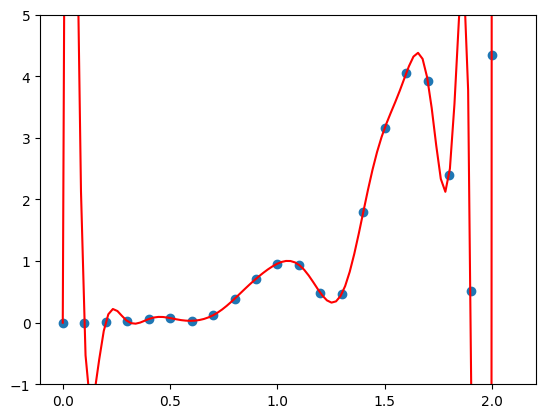

In [4]:
#plotting simple polynomial approximation

from matplotlib import pyplot as plt


lines = np.linspace(0, 2.1, 100)

cons = np.polyval(c, lines)
plt.ylim(-1, 5)
#fig = plt.figure()
#ax = fig.add_subplot(1, 1, 1)

plt.plot(lines, cons, '-r')

plt.scatter(xnp, ynp)

plt.show
print("Polynomial of degree ", len(c)-1)
#ax.scatter(x=, f=y, c='r', label='Multiple Points')

In [5]:
#approximation with lowest square method

n = 4
gram_vector = []
betta_vector = []
gamma = 0
betta = 0

for i in range(n+1):
    for j in range(n+1):
        for k in range (len(x)):
            gamma = gamma + pow(x[k], i) * pow(x[k], j)
        gram_vector.append(gamma)
        gamma = 0; 
        
for i in range(n+1):
    for k in range(len(x)):
        betta = betta + pow(x[k], i) * y[k]
    betta_vector.append(betta)
    betta = 0
        
b = np.array(betta_vector)
gram_vector = np.array(gram_vector)
G = gram_vector.reshape(n+1, n+1)

a = system_solve(G, b)

a = a[::-1]

nppoly = np.polynomial.polynomial.Polynomial(a)
sp.init_printing()
sp.Poly(nppoly.coef,t).as_expr()

delta 0 = 0.05975991018292705
delta 1 = -0.04351720986252939
delta 2 = -0.06870877650657863
delta 3 = -0.040134893898290294
delta 4 = 0.011463639646673782
delta 5 = 0.03715433164605933
delta 6 = -0.02793900454897953
delta 7 = -0.0026592497538820564
delta 8 = 0.1468450210493215
delta 9 = 0.2965435387120069
delta 10 = 0.30959433991896124
delta 11 = 0.0032707671883749345
delta 12 = -0.7834325311281497
delta 13 = -1.154218600845609
delta 14 = -0.19625118194558233
delta 15 = 0.8060762914237509
delta 16 = 1.3713976909476218
delta 17 = 0.9923411941446751
delta 18 = -0.6679847156330578
delta 19 = -2.5463652492000963
delta 20 = 1.4967646884623989

Avarage square error = 14.889674493854173

Polynomial of degree 4


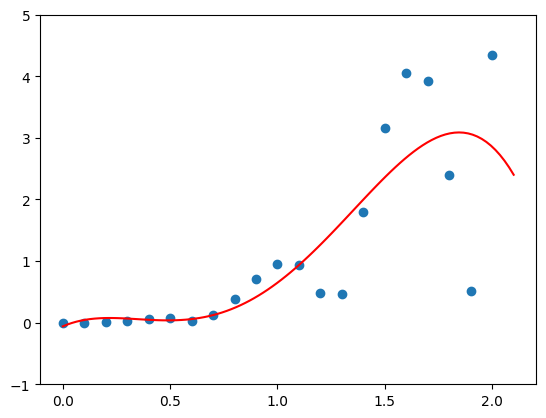

In [6]:
#plotting lowest square method approximation

from matplotlib import pyplot as plt

lines = np.linspace(0, 2.1, 100)

cons = np.polyval(a, lines)
plt.ylim(-1, 5)

plt.plot(lines, cons, '-r')

plt.scatter(xnp, ynp)

plt.show

J = 0
delta = 0

for i in range(len(x)):
    for k in range(len(a)):
        delta = delta + a[-1-k]*pow(x[i], k)
    J = J + pow(y[i] - delta, 2)
    print("delta", i, "=", y[i] - delta)
    delta = 0

print("\nAvarage square error =", J)
print("\nPolynomial of degree", n)

Both approximations plotted


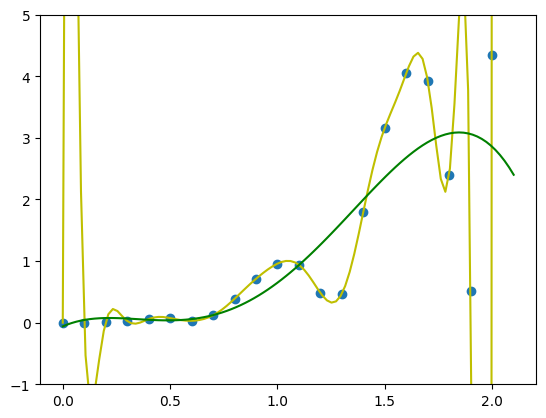

In [7]:
#plotting both polynoms for comparison

cons = np.polyval(c, lines)
plt.ylim(-1, 5)

plt.plot(lines, cons, '-y')

cons = np.polyval(a, lines)
plt.ylim(-1, 5)

plt.plot(lines, cons, '-g')

plt.scatter(xnp, ynp)

plt.show

print("Both approximations plotted")